<a href="https://colab.research.google.com/github/Somiya19/SCT_DS_2/blob/main/task2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import os
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r"C:\Users\SUPREETH\Downloads\test.csv", encoding='latin1')
df = pd.read_csv(r"C:\Users\SUPREETH\Downloads\gender_submission.csv", encoding='latin1')
df = pd.read_csv(r"C:\Users\SUPREETH\Downloads\train.csv", encoding='latin1')

if 'Age' in df.columns:
    df['Age']= df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
        df.drop('Cabin', axis=1, inplace=True)

sns.set(style="whitegrid")

sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived', palette='BuGn')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

sns.histplot(data=df, x='Age', bins=30, kde=True, color='red')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Paid vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

numeric_features=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

contingency_table=pd.crosstab(df['Pclass'], df['Survived'])
chi2, chi_pval, dof, expwcted=stats.chi2_contingency(contingency_table)
print("\nChi-Square Test between Pclass and Survival")
print("Chi2 Statistic:", chi2)
print("P-value:", chi_pval)

from statsmodels.stats.proportion import proportions_ztest

survived_female=df[(df['Sex']=='female')&(df['Survived']==1)].shape[0]
total_female=df[df['Sex']=='female'].shape[0]
survived_male=df[(df['Sex']=='male')&(df['Survived']==1)].shape[0]
total_male=df[df['Sex']=='male'].shape[0]

count=np.array([survived_female,survived_male])
nobs=np.array([total_female,total_male])
z_stat,z_pval=proportions_ztest(count,nobs)
print("\nZ-test for Survival between Genders")
print("Z-statistic:",z_stat)
print("P-value:",z_pval)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\SUPREETH\\Downloads\\test.csv'

In [ ]:
# Install missing packages (if needed)
!pip install statsmodels seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# --- Upload Files in Colab ---
from google.colab import files
uploaded = files.upload()  # Upload train.csv, test.csv, gender_submission.csv

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

# Work on train dataset for EDA
df = train_df.copy()

# --- Data Cleaning ---
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# --- Visualization ---
sns.set(style="whitegrid")

# Survival count by Gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

# Survival count by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='BuGn')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True, color='red')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Fare vs Survival
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Paid vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Correlation heatmap
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# --- Statistical Tests ---
# Chi-square test: Pclass vs Survival
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, chi_pval, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test between Pclass and Survival")
print("Chi2 Statistic:", chi2)
print("P-value:", chi_pval)

# Z-test: Survival difference between Genders
from statsmodels.stats.proportion import proportions_ztest

survived_female = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
total_female = df[df['Sex'] == 'female'].shape[0]
survived_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
total_male = df[df['Sex'] == 'male'].shape[0]

count = np.array([survived_female, survived_male])
nobs = np.array([total_female, total_male])

z_stat, z_pval = proportions_ztest(count, nobs)
print("\nZ-test for Survival between Genders")
print("Z-statistic:", z_stat)
print("P-value:", z_pval)


KeyboardInterrupt: 

In [ ]:
# Titanic Dataset Analysis in Google Colab (using file upload)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from google.colab import files
import warnings

warnings.filterwarnings("ignore")

# ---- Step 1: Upload Files ----
print("Please upload train.csv, test.csv, and gender_submission.csv")
uploaded = files.upload()

# ---- Step 2: Load Datasets ----
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

# Work with train dataset for EDA
df = train_df.copy()

# ---- Step 3: Data Cleaning ----
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# ---- Step 4: Visualizations ----
sns.set(style="whitegrid")

# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

# Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='BuGn')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

# Age Distribution
sns.histplot(data=df, x='Age', bins=30, kde=True, color='red')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Fare vs Survival
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Paid vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Correlation Heatmap
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ---- Step 5: Statistical Tests ----
# Chi-Square Test (Pclass vs Survival)
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, chi_pval, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test between Pclass and Survival")
print("Chi2 Statistic:", chi2)
print("P-value:", chi_pval)

# Z-test (Survival difference between Genders)
survived_female = df[(df['Sex']=='female')&(df['Survived']==1)].shape[0]
total_female = df[df['Sex']=='female'].shape[0]
survived_male = df[(df['Sex']=='male')&(df['Survived']==1)].shape[0]
total_male = df[df['Sex']=='male'].shape[0]

count = np.array([survived_female, survived_male])
nobs = np.array([total_female, total_male])
z_stat, z_pval = proportions_ztest(count, nobs)

print("\nZ-test for Survival between Genders")
print("Z-statistic:", z_stat)
print("P-value:", z_pval)


Please upload train.csv, test.csv, and gender_submission.csv


KeyboardInterrupt: 

In [ ]:
from google.colab import files
print("Please upload train.csv, test.csv, and gender_submission.csv")
uploaded = files.upload()  # pick all three from your computer

In [ ]:
from google.colab import files
print("Please upload train.csv, test.csv, and gender_submission.csv")
uploaded = files.upload()


Please upload train.csv, test.csv, and gender_submission.csv


Saving gender_submission.csv to gender_submission.csv
Saving train.csv to train (2).csv
Saving test.csv to test.csv


In [ ]:
import pandas as pd

# Filenames must match exactly what you uploaded
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

# Work on train dataset
df = train_df.copy()

# Quick sanity checks
print(train_df.shape, test_df.shape, gender_df.shape)
df.head()


(891, 12) (418, 11) (418, 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


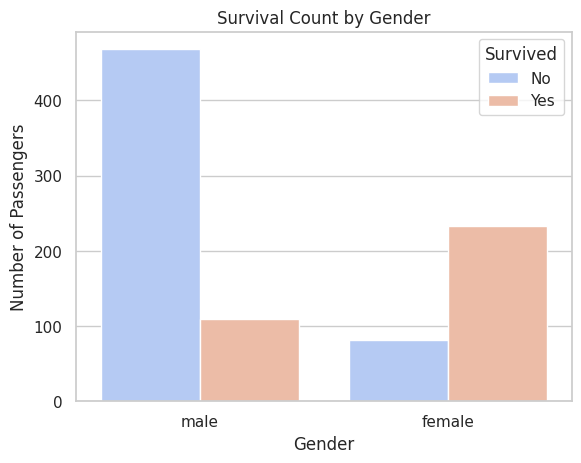

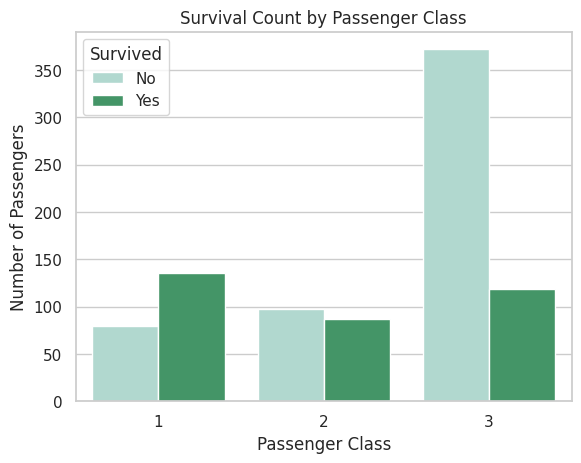

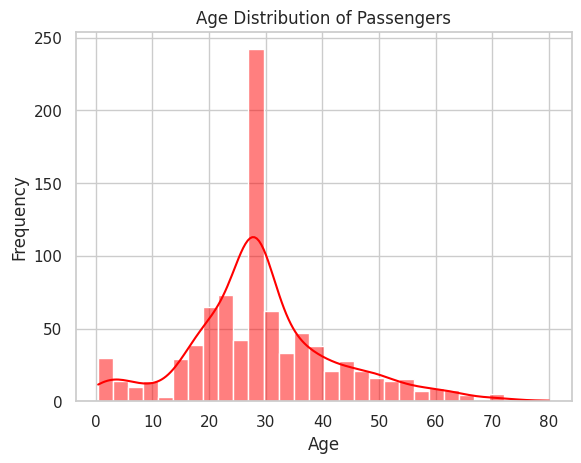

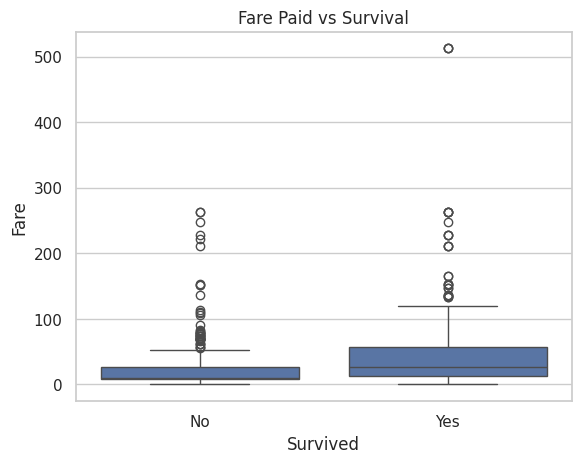

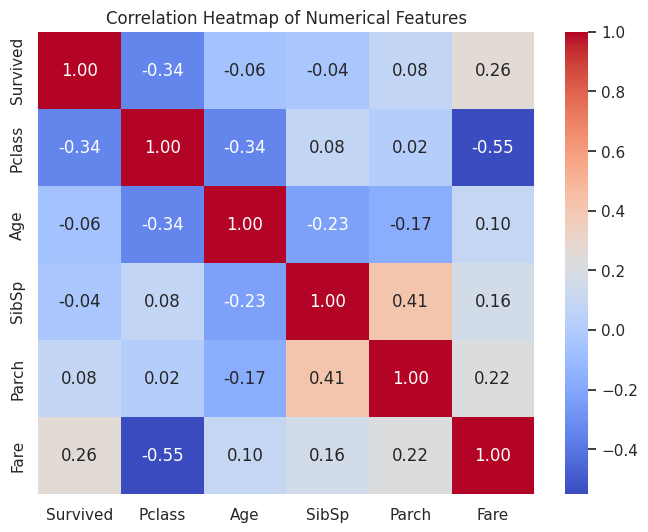


Chi-Square Test between Pclass and Survival
Chi2 Statistic: 102.88898875696056
P-value: 4.549251711298793e-23

Z-test for Survival between Genders
Z-statistic: 16.218833930670097
P-value: 3.7117477701134797e-59


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings("ignore")

# --- Data Cleaning ---
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# --- Visualizations ---
sns.set(style="whitegrid")

sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender"); plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived', palette='BuGn')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class"); plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

sns.histplot(data=df, x='Age', bins=30, kde=True, color='red')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age"); plt.ylabel("Frequency")
plt.show()

sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Paid vs Survival")
plt.xlabel("Survived"); plt.ylabel("Fare")
plt.xticks([0,1], ['No','Yes'])
plt.show()

# Correlation heatmap
numeric_features = ['Survived','Pclass','Age','SibSp','Parch','Fare']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# --- Statistical Tests ---
# Chi-square: Pclass vs Survival
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, chi_pval, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test between Pclass and Survival")
print("Chi2 Statistic:", chi2)
print("P-value:", chi_pval)

# Z-test: Gender survival rates
survived_female = df[(df['Sex']=='female') & (df['Survived']==1)].shape[0]
total_female    = df[df['Sex']=='female'].shape[0]
survived_male   = df[(df['Sex']=='male') & (df['Survived']==1)].shape[0]
total_male      = df[df['Sex']=='male'].shape[0]

count = np.array([survived_female, survived_male])
nobs  = np.array([total_female, total_male])

z_stat, z_pval = proportions_ztest(count, nobs)
print("\nZ-test for Survival between Genders")
print("Z-statistic:", z_stat)
print("P-value:", z_pval)
